In [139]:
from os import listdir
import pandas as pd
from collections import defaultdict, Counter
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [140]:
# Data source: http://web.mta.info/developers/turnstile.html
datafiles = ['../data/mta_turnstiles/' + x for x in listdir('../data/mta_turnstiles/')]

list_ = []
for file_ in datafiles:
    df = pd.read_csv(file_)
    list_.append(df)
frame = pd.concat(list_)
frame.rename(columns=lambda x: x.strip())


datetimes = []
for index, row in frame.iterrows():
    dstr = row['DATE'] + ' ' + row['TIME']
    datetimes.append(datetime.strptime(dstr, '%m/%d/%Y %H:%M:%S'))
date_min = min(datetimes)
date_max = max(datetimes)
# frame['DATETIME'] = datetimes
# del frame['DATE']
# del frame['TIME']

print frame.shape
frame.head(10)

# Slice a limited sample to speed up processing
# frame = frame[:50000]

(777253, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,05/21/2016,00:00:00,REGULAR,5672118,1920707
1,A002,R051,02-00-00,59 ST,NQR456,BMT,05/21/2016,04:00:00,REGULAR,5672183,1920719
2,A002,R051,02-00-00,59 ST,NQR456,BMT,05/21/2016,08:00:00,REGULAR,5672214,1920761
3,A002,R051,02-00-00,59 ST,NQR456,BMT,05/21/2016,12:00:00,REGULAR,5672330,1920867
4,A002,R051,02-00-00,59 ST,NQR456,BMT,05/21/2016,16:00:00,REGULAR,5672640,1920936
5,A002,R051,02-00-00,59 ST,NQR456,BMT,05/21/2016,20:00:00,REGULAR,5673031,1921000
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/22/2016,00:00:00,REGULAR,5673268,1921052
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/22/2016,04:00:00,REGULAR,5673298,1921061
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/22/2016,08:00:00,REGULAR,5673312,1921080
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/22/2016,12:00:00,REGULAR,5673379,1921156


In [141]:
# Build dictionary for challenge 1

device_audits = defaultdict(list)

for index, row in frame.iterrows():
    device_audits[tuple(row[0:4])].append(row[4:].tolist())
    
print len(device_audits)


4603


In [142]:
# Build dictionary for challenge 2
# datetime, entries

# Get all audits
device_audits = defaultdict(list)

for index, row in frame.iterrows():
    dstr = row['DATE'] + ' ' + row['TIME']
    datetime = datetime.strptime(dstr, '%m/%d/%Y %H:%M:%S')
    en = row[u'ENTRIES']
    device_audits[tuple(row[0:4])].append([datetime,en])
    
print len(device_audits)


# Change audits to counts by subtracting values
device_counts = {device: 
                 [(row[i][0], 
                   row[i+1][0] - row[i][0], 
                   row[i+1][1] - row[i][1]) for i in range(len(row)-1)]
                  for device, row in device_audits.iteritems()}

4603


In [143]:
# Look at counts
all_counts = [count for rows in device_counts.values() for (_, _, count) in rows]
all_counts.sort()
print all_counts[-50:]
print all_counts[:120]

# Look at durations
all_times = [duration.total_seconds() / 60 / 60
             for rows in device_counts.values()
             for _, duration, _ in rows]
print Counter(all_times).most_common(10)

# Remove bad counts
datetime_counts = {turnstile: [(time, count)
                               for (time, _, count) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in device_counts.items()}

# Look at good counts
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print float(len(all_good_counts)) / len(all_counts)

all_good_counts.sort()
print all_good_counts[-5:]
print all_good_counts[:5]

[3033, 3060, 3076, 3096, 3116, 3125, 3168, 3206, 3242, 3320, 3321, 3355, 3367, 3378, 3735, 3768, 4203, 4545, 4695, 5058, 5068, 6078, 6440, 6625, 7370, 7554, 7726, 9003, 10289, 13286, 17168, 17720, 66568, 261543, 393174, 1291975, 1629370, 2402797, 2557082, 2557829, 49514290, 83519145, 116224139, 117416496, 117439681, 317504870, 519992536, 1403818353, 1879007766, 2076115187]
[-1609769922, -1409336682, -519992452, -302009169, -151085187, -117416496, -50370646, -16810693, -14151887, -8092732, -6450530, -6249543, -4313168, -3152690, -2886522, -2754015, -2728372, -2557080, -2556224, -2234351, -2130307, -2082158, -1933256, -1693086, -1629062, -1303776, -1153863, -853125, -801481, -725861, -557859, -530089, -527759, -515629, -393172, -326195, -297769, -281880, -202674, -183043, -174839, -170770, -135440, -105170, -102445, -80768, -78879, -68579, -66457, -46765, -31435, -18659, -17720, -16431, -14866, -11540, -11191, -8197, -3168, -2682, -2393, -2288, -2060, -1993, -1968, -1932, -1902, -1894, -

## Times

Audits are usually taken every 4 hours, but there are also irregular audits in the data.  The DESC variable indicates whether a particular audit was taken regularly or not (http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt).  Samples may be taken irregularly due to planning or troubleshooting activities.

In [144]:
print "Count of audit types"
for s in set(frame["DESC"]):
    ct = frame["DESC"].tolist().count(s)
    print "%s: %d"%(s,ct)

Count of audit types
REGULAR: 774162
RECOVR AUD: 3091


In [145]:
# Challenge 3

# Collapse a list of audits so that all audits on the same are combined into one
def collapse_days(l):
    day_entries = []
    dayset = sorted(set([x[0].date() for x in l]))
    for day in dayset:
        entries = sum([x[1] for x in l if x[0].date() == day])
        day_entries.append((day, entries))
    return day_entries

device_counts_daily = defaultdict(list)
for key,value in datetime_counts.iteritems():
    device_counts_daily[key] = collapse_days(value)
    
print device_counts_daily.iteritems().next()




(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'), [(datetime.date(2016, 5, 21), 820), (datetime.date(2016, 5, 22), 640), (datetime.date(2016, 5, 23), 1533), (datetime.date(2016, 5, 24), 1502), (datetime.date(2016, 5, 25), 1593), (datetime.date(2016, 5, 26), 1638), (datetime.date(2016, 5, 27), 1455), (datetime.date(2016, 5, 28), 784), (datetime.date(2016, 5, 29), 660), (datetime.date(2016, 5, 30), 701), (datetime.date(2016, 5, 31), 1381), (datetime.date(2016, 6, 1), 1490), (datetime.date(2016, 6, 2), 1462), (datetime.date(2016, 6, 3), 1522), (datetime.date(2016, 6, 4), 846), (datetime.date(2016, 6, 5), 615), (datetime.date(2016, 6, 6), 1461), (datetime.date(2016, 6, 7), 1643), (datetime.date(2016, 6, 8), 1508), (datetime.date(2016, 6, 9), 1460), (datetime.date(2016, 6, 10), 1452), (datetime.date(2016, 6, 11), 794), (datetime.date(2016, 6, 12), 638), (datetime.date(2016, 6, 13), 1505), (datetime.date(2016, 6, 14), 1544), (datetime.date(2016, 6, 15), 1532), (datetime.date(2016, 6, 16), 1262

('H019', 'R294', '00-06-00', 'MORGAN AV')


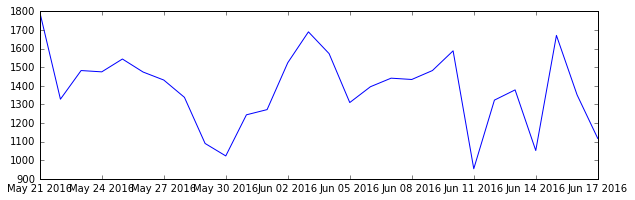

In [146]:
# Challenge 4

%matplotlib inline


turnstiles = device_counts_daily.iteritems()
for i in range(19):
    stile = turnstiles.next()

print stile[0]
ts_data = np.array(stile[1])

dates = ts_data[:,0]
counts = ts_data[:,1]

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

In [147]:
# Standardize data into standardized shift samples

turnstiles = datetime_counts.iteritems()
turnstile_shifts = []

# Make list of standardized times
time_max = float((date_max - date_min).total_seconds())
standard_times = np.arange(0.0, time_max, step=float(3600*4))

for stile in turnstiles:
    ts_data = np.array(stile[1])
    
    if ts_data.shape[0] < 10:
        continue
    
    dates = ts_data[:,0]
    counts = ts_data[:,1].astype(float)
    
    # Convert each time into seconds since begnning of sample
    diff_sec = lambda x: float((x - date_min).total_seconds())
    time_seconds = map(diff_sec, dates)
    
    #counts_cum = np.cumsum(counts)
    #counts_4hours_cum = np.interp(standard_times, time_seconds, counts_cum, left=0, right=0)
    #counts_4hours = [counts_4hours_cum[0]] + np.diff(counts_4hours_cum)
    #counts_4hours = [max(0,x) for x in counts_4hours]
    
    counts_4hours = np.interp(standard_times, time_seconds, counts, left=0, right=0)
    
    for (t,c) in zip(standard_times, counts_4hours):
        turnstile_shifts.append((stile[0], t, c))
        
turnstile_shifts = np.array(turnstile_shifts)

#plt.hist(turnstile_shifts[:,2].astype(float))


In [148]:
# Combine turnstiles into stations
daycodes = ['MO','TU','WE','TH','FR','SA','SU']
station_shifts_dict = dict()
for s in turnstile_shifts:
    dt = timedelta(seconds=(float(s[1]))) + date_min
    wkdy = daycodes[dt.weekday()]
    tm = dt.hour
    daytime = wkdy + str(tm)
    
    key = (s[0][3], daytime)
    station_shifts_dict[key] = station_shifts_dict.get(key, 0) + float(s[2])

station_shifts = []
for key, val in station_shifts_dict.items():
    station_shifts.append(list(key + (val,)))


# for sh in station_shifts:
#     dt = timedelta(seconds=(float(sh[1]))) + date_min
#     wkdy = daycodes[dt.weekday()]
#     tm = dt.hour
#     sh[1] = wkdy + str(tm)

# Print best shifts
station_shifts = np.array(station_shifts)

best_shifts = np.argsort(station_shifts[:,2].astype(float))[::-1]
station_shifts[best_shifts[:5]]

array([['GRD CNTRL-42 ST', 'WE16', '264820.75'],
       ['GRD CNTRL-42 ST', 'TU16', '261156.635088'],
       ['GRD CNTRL-42 ST', 'TH16', '253392.75'],
       ['34 ST-PENN STA', 'TU8', '217733.283784'],
       ['34 ST-HERALD SQ', 'WE16', '215555.0']], 
      dtype='|S15')

In [157]:
# Load match list: dictionary with keys as names of turnstile stations, vals as Max stations
station_pairs = dict()
with open('../data/turnstile_pairs.csv','r') as f:
    for line in f:
        line = line.rstrip().split(',')
        if len(line)<2:
            continue
        if len(line)>2:
            print line
        st1s = line[1].split('?')
        st2 = line[0].split('?')[0]
        for st1 in st1s:
            station_pairs[st1] = st2

# Load max's data
station_poi = []
with open('../data/poi/stationTargetProxy_rev.csv','r') as f:
    f.next()
    for line in f:
        line = line.split(',')
        line = line[:1] + map(int, line[1:])
        station_poi.append(line)

# Link turnstiles to max data
turn_stations = list(set(station_shifts[:,0]))
poi_stations = [x[0] for x in station_poi]

poi = dict()
usable_stations = []
for st1 in turn_stations:
    if st1 in station_pairs:
        st2 = station_pairs[st1]
        
        
        max_ind = poi_stations.index(st2)
        
        poi[st1] = station_poi[max_ind]
        usable_stations.append(st1)

#print set(turn_stations).difference(set(usable_stations))
print poi[turn_stations[0]]

['CYPRESS AV', 0, 0, 0]


In [150]:
# Print best shifts
shift_scores = []
for s in station_shifts:
    
    if not s[0] in usable_stations:
        continue
    
    schct = poi[s[0]][1]
    busct = poi[s[0]][2]
    trafc = float(s[2])
    
    score = 0.25*schct + 0.25*busct/10 + 0.5*trafc/30000
    
    shift_scores.append((s[0],s[1],score, schct, busct, trafc))
    
shift_scores = np.array(shift_scores)
best_shifts = np.argsort(shift_scores[:,2].astype(float))[::-1]
shift_scores_sorted = []
for i in best_shifts:
    shift_scores_sorted.append(shift_scores[i])

for i in range(50):
    print shift_scores_sorted[i]


['GRD CNTRL-42 ST' 'WE16' '6.38867916667' '7' '9' '264820.75']
['GRD CNTRL-42 ST' 'TU16' '6.3276105848' '7' '9' '261156.635088']
['GRD CNTRL-42 ST' 'TH16' '6.1982125' '7' '9' '253392.75']
['23 ST' 'TH16' '6.0461125' '8' '31' '196266.75']
['23 ST' 'WE16' '6.03959166667' '8' '31' '195875.5']
['23 ST' 'TU16' '5.9947375' '8' '31' '193184.25']
['34 ST-PENN STA' 'TU8' '5.67888806307' '7' '12' '217733.283784']
['34 ST-HERALD SQ' 'WE16' '5.64258333333' '7' '12' '215555.0']
['34 ST-HERALD SQ' 'TH16' '5.63146666667' '7' '12' '214888.0']
['34 ST-PENN STA' 'TH8' '5.57564144143' '7' '12' '211538.486486']
['34 ST-HERALD SQ' 'TU16' '5.56121666667' '7' '12' '210673.0']
['GRD CNTRL-42 ST' 'FR16' '5.4889' '7' '9' '210834.0']
['23 ST' 'FR16' '5.44547916667' '8' '31' '160228.75']
['GRD CNTRL-42 ST' 'MO16' '5.35156011905' '7' '9' '202593.607143']
['34 ST-PENN STA' 'WE8' '5.34998383268' '7' '12' '197999.029961']
['23 ST' 'MO16' '5.32390305542' '8' '31' '152934.183325']
['34 ST-HERALD SQ' 'FR16' '5.213387037

31.0


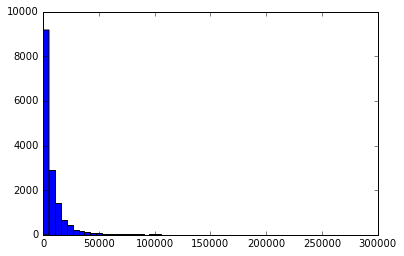

In [168]:
print max(np.array(station_poi)[:,2].astype(float))


max_traffic = max(station_shifts[:,2].astype(float))

ax = plt.hist(station_shifts[:,2].astype(float), 50)

curtime = str(datetime.now().strftime('%m%d%H%M.csv'))
with open('../results/shift_scores%s'%curtime, 'w') as f:
    f.write('STATION,SHIFT,COMB_SCORE,SCHOOLS,BUSINESS,TRAFFIC\n')
    for row in shift_scores_sorted:
        f.write(','.join(row)+'\n')

    

In [152]:
wkdys = ['MO','TU','WE','TH','FR']
wknds = ['SA','SU']
stations = set(station_shifts[:,0])
shift_hrs = map(lambda x: '%d'%(x),range(0,24,4))
wkdy_shifts = []
wknd_shifts = []
for hr in shift_hrs:
    for station in stations:
        wkdy_comb = 0
        for dy in wkdys:
            hits = [float(s[2]) for s in station_shifts if (s[0],s[1])==(station,(dy+hr))]
            if len(hits)!=1:
                print (station,(dy+hr)), str(hits)
            wkdy_comb += hits[0]
        wkdy_shifts.append((station,hr,wkdy_comb/5))
    
for hr in shift_hrs:
    for station in stations:
        wknd_comb = 0
        for dy in wknds:
            hits = [float(s[2]) for s in station_shifts if (s[0],s[1])==(station,(dy+hr))]
            if len(hits)!=1:
                print (station,(dy+hr)), str(hits)
            wknd_comb += hits[0]
        wknd_shifts.append((station,hr,wknd_comb/2))
    


['0', '4', '8', '12', '16', '20']


In [175]:

def stscore(schools,businesses,traffic):
    return 0.2*schools/9 + 0.2*businesses/31 + 0.6*traffic/max_traffic

def make_combined(shifts):
    res = []
    for shift in shifts:
        station = shift[0]
        time = shift[1]
        traffic = shift[2]
        if not station in poi:
            continue
        (schools, businesses) = tuple(poi[station][1:-1])
        res.append((station,time,schools,businesses,traffic,stscore(schools,businesses,traffic)))
    return res
wkdy_comb = make_combined(wkdy_shifts)
wknd_comb = make_combined(wknd_shifts)
    
wkdy_comb = np.array(wkdy_comb)
wknd_comb = np.array(wknd_comb)

def printfile(data, name):
    headerline = "station,time,schools,tech,traffic,comb_score\n"
    with open(name, 'w') as f:
        f.write(headerline)
        for line in data:
            f.write(','.join(line)+'\n')


wkdy_comb = wkdy_comb[np.argsort(wkdy_comb[:,-1].astype(float))[::-1]]
printfile(wkdy_comb, '../results/wkdy.csv')

wknd_comb = wknd_comb[np.argsort(wknd_comb[:,-1].astype(float))[::-1]]
printfile(wknd_comb, '../results/wknd.csv')


In [190]:
stations = set(wkdy_comb[:,0])
shift_hrs = map(lambda x: '%d'%(x),range(8,20,4))

for hr in shift_hrs:
    shifts = np.array([wc for wc in wkdy_comb if wc[1]==hr])
    inds = np.argsort(shifts[:,-1].astype(float))[::-1]
    toshow = []
    for i in range(5):
        toshow.append((shifts[inds[i]][0],shifts[inds[i]][-1]))
    print hr
    print np.array(toshow)
    

8
[['34 ST-PENN STA' '0.677487413308']
 ['23 ST' '0.54201993659']
 ['GRD CNTRL-42 ST' '0.441452683632']
 ['34 ST-HERALD SQ' '0.422036228286']
 ['42 ST-PORT AUTH' '0.383431144704']]
12
[['23 ST' '0.615047629177']
 ['GRD CNTRL-42 ST' '0.504184374678']
 ['34 ST-PENN STA' '0.504054833884']
 ['34 ST-HERALD SQ' '0.452040271901']
 ['28 ST' '0.403794411626']]
16
[['23 ST' '0.784916312047']
 ['GRD CNTRL-42 ST' '0.754120501004']
 ['34 ST-HERALD SQ' '0.689321728635']
 ['34 ST-PENN STA' '0.636256338569']
 ['TIMES SQ-42 ST' '0.531293862508']]


In [182]:
wkdf = pd.read_csv('../results/wkdy.csv')
wkdf.pivot_table(index=['time', 'station'], values=['comb_score'])


comb_score
time station                    
0    1 AV               0.095723
     103 ST             0.054040
     103 ST-CORONA      0.046651
     104 ST             0.000445
     110 ST             0.001420
     111 ST             0.002643
     116 ST             0.052341
     116 ST-COLUMBIA    0.046761
     121 ST             0.000557
     125 ST             0.083138
     135 ST             0.070083
     137 ST CITY COL    0.048044
     138/GRAND CONC     0.022969
     14 ST              0.142381
     14 ST-UNION SQ     0.198457
     145 ST             0.026763
     149/GRAND CONC     0.024858
     14TH STREET        0.127812
     15 ST-PROSPECT     0.000614
     155 ST             0.023910
     157 ST             0.002067
     161/YANKEE STAD    0.029497
     163 ST-AMSTERDM    0.001136
     167 ST             0.002743
     169 ST             0.000755
     170 ST             0.003035
     174 ST             0.001609
     174-175 STS        0.022948
     175 ST             0.000823
     176 ST             0.023067
...                          ...
20   SPRING ST          0.097907
     ST LAWRENCE AV     0.002227
     STEINWAY ST        0.014037
     STERLING ST        0.025053
     SUTPHIN BLVD       0.002122
     SUTPHIN-ARCHER     0.021000
     SUTTER AV          0.003457
     SUTTER AV-RUTLD    0.005402
     TIMES SQ-42 ST     0.335991
     TREMONT AV         0.050076
     UNION ST           0.005887
     UTICA AV           0.012605
     V.CORTLANDT PK     0.003747
     VAN SICLEN AV      0.005079
     VAN SICLEN AVE     0.001898
     VERNON-JACKSON     0.062900
     W 4 ST-WASH SQ     0.142765
     W 8 ST-AQUARIUM    0.001474
     WAKEFIELD/241      0.004336
     WALL ST            0.165803
     WESTCHESTER SQ     0.003771
     WHITEHALL S-FRY    0.057574
     WHITLOCK AV        0.001164
     WILSON AV          0.001845
     WINTHROP ST        0.026890
     WOODHAVEN BLVD     0.020864
     WOODLAWN           0.005758
     WORLD TRADE CTR    0.053224
     YORK ST            0.065573
     ZEREGA AV          0.001304

[2034 rows x 1 columns]